In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.io import loadmat
from sklearn.decomposition import PCA
import random

#KNN Classifier

# loading library
from sklearn.neighbors import KNeighborsClassifier  

In [2]:
def loaddata(filename):
    """
    Returns xTr,yTr,xTe,yTe
    xTr, xTe are in the form nxd
    yTr, yTe are in the form nx1
    """
    data = loadmat(filename)
    xTr = data["x"]; # load in Training data
    yTr = np.round(data["y"]); # load in Training labels

    return xTr,yTr

In [3]:
xTr,yTr=loaddata("train.mat")

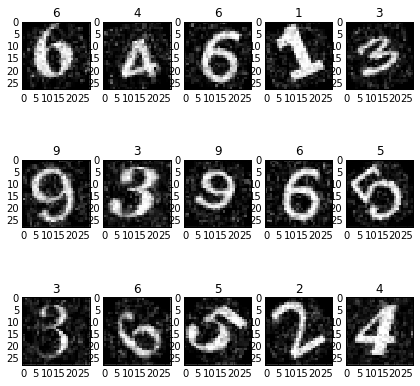

In [4]:
plt.figure(figsize=(7,7))
for i in range(15):
    label = np.where(yTr[i])[0][0]
    a = xTr[i,:]
    a = a.reshape(28,28)
    plt.subplot(3, 5, i+1 )
    plt.imshow(a, interpolation='none',cmap='gray')
    plt.title('%i' % label)

In [6]:
def findlabel(y):
    return np.where(y)[0][0]
    

In [7]:
a = xTr[0,:]
a = a.reshape(28,28)

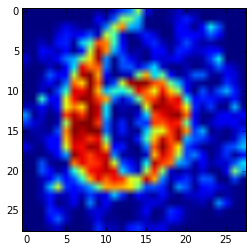

In [8]:
plt.imshow(a)

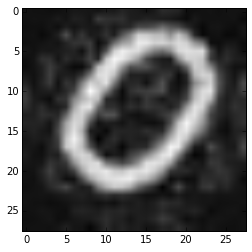

In [9]:
a = (xTr[22,:]).reshape(28,28)
pca = PCA(n_components = 9)
pca.fit(a)
a_pca = pca.fit_transform(a)
plt.imshow(a_pca)
a_restored = pca.inverse_transform(a_pca)
plt.imshow(a_restored,cmap='gray')

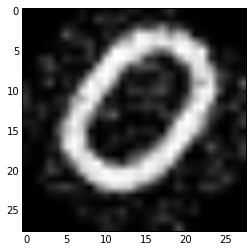

In [10]:
plt.imshow(a,cmap='gray')

## Run PCA until the original image and the compressed image is different only by 0.7 in Frobenius norm, and find the number of components necessary

In [11]:
a = (xTr[20,:]).reshape(28,28)
eps=10
n_components = 1
prev = 0 

while eps>=1.0 and n_components<28:
    n_components+=1
    pca = PCA(n_components)
    pca.fit(a)
    a_pca = pca.fit_transform(a)
    a_restored = pca.inverse_transform(a_pca)
    prev = eps
    eps = np.linalg.norm(a-a_restored)
    print eps,n_components, prev-eps



4.97068216185 2 5.02931783815
3.76219665566 3 1.20848550619
2.79112568061 4 0.971070975051
2.10061968377 5 0.690505996836
1.8343545313 6 0.266265152467
1.56747124449 7 0.26688328681
1.36507244771 8 0.202398796785
1.21392757412 9 0.15114487359
1.09445714244 10 0.119470431681
0.970843003412 11 0.123614139028


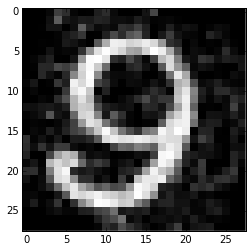

In [12]:
plt.imshow(a,cmap='gray',interpolation='none')

In [13]:

def denoise(xTr,n_components=10):
    '''
        A function to denoise the images with PCA
        Input: the entire xTr, the number of components is set to 10
        Output: a new matrix with the smame dimension as xTr
    '''
    a = np.zeros([4000,784])
    for i in range(4000):
        b = xTr[i,:].reshape(28,28)
        eps =10
        n_components = 0
        while eps>=1.8 and n_components<28:
            n_components+=1
            pca = PCA(n_components)
            pca.fit(b)
            a_pca = pca.fit_transform(b)
            a_restored = pca.inverse_transform(a_pca)
            eps = np.linalg.norm(b-a_restored)
        b = a_restored
        a[i,:] = b.reshape(1,784)
        
    return a


In [16]:
#dd = denoise(xTr)


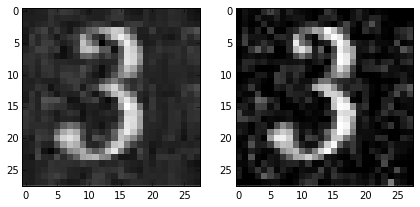

In [17]:
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(dd[321].reshape(28,28),interpolation='none',cmap='gray')
plt.subplot(1,2,2)
plt.imshow(xTr[321].reshape(28,28),interpolation='none',cmap='gray')


In [18]:
def gaussian_blurr(xTr,sigma=0.3):
    from scipy import ndimage
    n,d = xTr.shape
    new = np.zeros([n,d])
    for i in range(n):
        a = xTr[i,:].reshape(28,28)
        a = ndimage.gaussian_filter(a, sigma)
        new[i,:] = a.reshape(1,d)
    return new

In [19]:
new = gaussian_blurr(xTr)

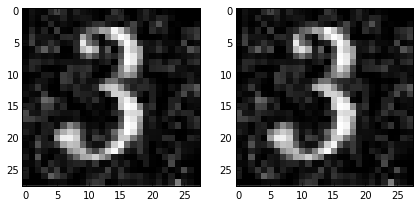

In [20]:
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(new[321].reshape(28,28),interpolation='none',cmap='gray')
plt.subplot(1,2,2)
plt.imshow(xTr[321].reshape(28,28),interpolation='none',cmap='gray')


In [21]:
#PCA denoise with 10 components
#dd = denoise(xTr)


In [23]:

from sklearn import ensemble

In [24]:
n,d = dd.shape
#Create random indices 
sample_index=random.sample(range(n),int(n*0.8)) #20-80
valid_index=[i for i in range(n) if i not in sample_index]


#Sample and validation images
sample_images=[dd[i] for i in sample_index]
valid_images=[dd[i] for i in valid_index]

#Sample and validation targets
sample_target=[findlabel(yTr[i]) for i in sample_index]
valid_target=[findlabel(yTr[i]) for i in valid_index]

#Using the Random Tree Classifier
classifier = ensemble.RandomForestClassifier()

#Fit model with sample data
classifier.fit(sample_images, sample_target)

#Attempt to predict validation data
score=classifier.score(valid_images, valid_target)
print 'Random Tree Classifier:\n' 
print 'Score\t'+str(score)

Random Tree Classifier:

Score	0.6025


In [25]:
new = gaussian_blurr(xTr,0.2)

n,d = new.shape
#Create random indices 
sample_index=random.sample(range(n),int(n*0.8)) #20-80
valid_index=[i for i in range(n) if i not in sample_index]


#Sample and validation images
sample_images=[xTr[i] for i in sample_index]
valid_images=[xTr[i] for i in valid_index]

#Sample and validation targets
sample_target=[findlabel(yTr[i]) for i in sample_index]
valid_target=[findlabel(yTr[i]) for i in valid_index]

#Using the Random Tree Classifier
classifier = ensemble.RandomForestClassifier()

#Fit model with sample data
classifier.fit(sample_images, sample_target)

#Attempt to predict validation data
score=classifier.score(valid_images, valid_target)
print 'Random Tree Classifier:\n' 
print 'Score\t'+str(score)

Random Tree Classifier:

Score	0.59


In [39]:
def analyze(kind,truth,preds):
    """
    function output=analyze(kind,truth,preds)         
    Analyses the accuracy of a prediction
    Input:
    kind='acc' classification error
    kind='abs' absolute loss
    (other values of 'kind' will follow later)
    """
     
    
    #truth=truth.flatten()
    preds=preds.flatten()
    
    length=len(truth)
    
    if kind == 'abs':
        # compute the absolute difference between truth and predictions
        try:
            output=sum(abs(truth-preds))/float(length)
        except:
            raise NotImplementedError('Your code goes here!')
    elif kind == 'acc':
        try:
            number=sum(truth==preds)
            output=number/float(length)
        except:
            raise NotImplementedError('Your code goes here!')
    
    return output

## Using a Gaussian blur with /sigma of 1.45 gives 92.6% accuracy

## Using sigma 0f 1.75 and 1NN gives 95.3% 

In [40]:
yTr.shape

(12000L, 10L)

In [41]:
xTr.shape

(12000L, 784L)

In [149]:
xTr,yTr=loaddata("rotated_train.mat")
new = gaussian_blurr(xTr,1.75)

#Sample and validation images
sample_images=[new[i] for i in sample_index]
valid_images=[xTr[i] for i in valid_index]

#Sample and validation targets
sample_target=[findlabel(yTr[i]) for i in sample_index]
valid_target=[findlabel(yTr[i]) for i in valid_index]

In [150]:

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=1,weights='distance')

# fitting the model
knn.fit(sample_images, sample_target)

# predict the response
pred = knn.predict(valid_images)

# evaluate accuracy
print analyze('acc',valid_target, pred)

0.95375


In [154]:
def knn(X,Y,n=1,cat=True):
    #Sample and validation images
    sample_images=[X[i] for i in sample_index]
    valid_images=[X[i] for i in valid_index]
    if cat==True:
        #Sample and validation targets
        sample_target=[findlabel(Y[i]) for i in sample_index]
        valid_target=[findlabel(Y[i]) for i in valid_index]
    else:
        #Sample and validation targets
        sample_target=[(Y[i]) for i in sample_index]
        valid_target=[(Y[i]) for i in valid_index]

    # instantiate learning model (k = 3)
    knn = KNeighborsClassifier(n_neighbors=1,weights='distance')

    # fitting the model
    knn.fit(sample_images, sample_target)

    # predict the response
    pred = knn.predict(valid_images)

    # evaluate accuracy
    print 'Accuracy',analyze('acc',valid_target, pred)
    return knn


In [159]:
xTr.shape

(12000L, 784L)

In [156]:
model0 = knn(xTr,yTr)

Accuracy 0.92


In [157]:

def loaddata2(filename):
    """
    Returns xTr,yTr,xTe,yTe
    xTr, xTe are in the form nxd
    yTr, yTe are in the form nx1
    """
    data = loadmat(filename)
    xTr = data["x"]; # load in Training data
    #yTr = np.round(data["y"]); # load in Training labels

    return xTr
xTest=loaddata2("test.mat")
# predict the response
pred = model0.predict(xTest)
pred[0:10]





array([3, 7, 7, 0, 2, 8, 8, 2, 8, 3], dtype=int64)

In [61]:
from keras.utils import np_utils
pred_csv = np_utils.to_categorical(pred)
pred_csv[0]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

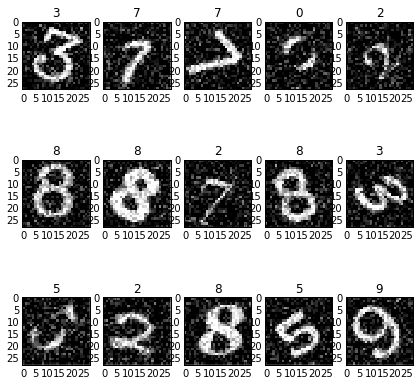

In [158]:
plt.figure(figsize=(7,7))
for i in range(15):
    
    label = pred[i]
    a = xTest[i,:]
    a = a.reshape(28,28)
    plt.subplot(3, 5, i+1 )
    plt.imshow(a, interpolation='none',cmap='gray')
    plt.title('%i' % label)

In [68]:
np.savetxt("submission.csv", pred, delimiter=",")

In [111]:
from keras.datasets import mnist

15302656/15296311 [==============================] - 2s     


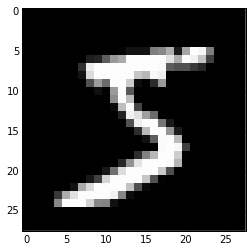

In [128]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[0],interpolation = 'none',cmap='gray')

In [129]:
X_train = X_train.reshape(60000,784)

In [136]:


knn(X_train,y_train,n=5,cat=False)

Accuracy 0.91875


In [143]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=1,weights='distance')

# fitting the model to the MNIST data set
knn.fit(X_train, y_train)


# predict the response with the inclass dataset
pred = knn.predict(xTr)
mnist_pred = [findlabel(yTr[i]) for i in range(len(yTr))]
# evaluate accuracy
print 'Accuracy',analyze('acc',pred, mnist_pred)

Accuracy

AttributeError: 'list' object has no attribute 'flatten'

In [146]:
pred[3]

1

In [4]:
import keras
import theano

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [5]:


import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')


In [6]:

# load data
X_train = sample_images
Y_train = sample_target
X_test = valid_images
Y_train = valid_target

NameError: name 'sample_images' is not defined

In [7]:
n = xTr.shape[0]
sample_index=random.sample(range(n),int(n*0.8)) #20-80
valid_index=[i for i in range(n) if i not in sample_index]

In [8]:
#Construct Training set
X_train = np.zeros([int(n*0.8), 784])
for i in range(len(sample_index)):
    X_train[i,:] = xTr[sample_index[i],:]

Y_train = np.zeros([len(sample_index),10])
for i in range(len(sample_index)):
    Y_train[i] = yTr[sample_index[i]]

In [9]:
#Construct Testing Set
X_test = np.zeros([len(valid_index), 784])
for i in range(len(valid_index)):
    X_test[i,:] = xTr[valid_index[i],:]
Y_test = np.zeros([len(valid_index),10])
for i in range(len(valid_index)):
    Y_test [i] = yTr[valid_index[i]]

In [10]:
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.reshape(X_train.shape[0], 1,28,28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1,28,28).astype('float32')
num_classes = Y_test.shape[1]

In [11]:
X_train.shape

(3200L, 1L, 28L, 28L)

In [12]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [13]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 3200 samples, validate on 800 samples
Epoch 1/10


KeyboardInterrupt: 

In [94]:
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], 1,28,28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1,28,28).astype('float32')

In [95]:
X_train.shape

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [96]:

# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10


KeyboardInterrupt: 